# Introduction to Network Analysis: Graph Concepts

-----

In this notebook, we introduce graphs by using the `networkx` library. Graph data not only contain intrinsic value, via nodes or vertices, but they also contain relationship value, via edges or links. Graphs can be used to represent a wide range of data including social relationships, physical networks, and business operations. Graphs can be undirected when the relationships between entities has no preferred direction or they can be directed, when a relationship is directed, such as parent to child or in social media when one person may follow another but not the other way around. Graphs can also allow or exclude multiple-connections  (or edges) between nodes.

With the networkx library, we have the following [four types][ngt] of graphs:

- `Graph`: a basic undirected graph,
- `DiGraph`: a basic directed graph,
- `MultiGraph`: an undirected graph that supports multiple edges (or links) between nodes, and
- `MultiDiGraph`: a directed graph that supports multiple edges (or links) between nodes.

In this notebook, we will focus on the basic components of a graph: nodes, edges, and attributes, before moving on to the different types of graphs. First, we set up the basic environment of this notebook before introducing creating a graph and adding nodes.

-----

[ngt]: https://networkx.readthedocs.org/en/stable/reference/classes.html

## Table of Contents

[Nodes](#Nodes)

[Edges](#Edges)

[Attributes](#Attributes)

[Matrix Representations](#Matrix-Representations)

[Directed Graphs](#Directed-Graphs)

[Multigraphs](#Multigraphs)

-----

Before proceeding with the rest of this notebook, we first include the notebook setup code.

-----

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# These two lines suppress warnings that sometimes
# occur when making visualizations
import warnings
warnings.filterwarnings('ignore')

-----

[[Back to TOC]](#Table-of-Contents)

## Nodes

The basic components in a graph are the nodes. Once we have created a graph, for example, by `nx.Graph` as shown below, we can begin to add nodes. A node can represent a number of different components, including a token, a document, a single person, a physical entity such as a computer or house, or a business. When using the networkx library, a node can be any Python object that is _hashable_, which essentially means nearly any Python object can be used as a node. While we often use simple constructs for nodes (since they often represent some physical construct), in some cases this capability can be very important.

In the following Code cells, we first create and draw different types of graphs (all of which contain no edges). First, we create a single node graph, whose node is the integer one. Next, we add tow more nodes, with the integers two and three, before expanding the graph to fourteen nodes, that span the integers one through fourteen. Finally, we display the list of nodes by calling the `nodes()` method on the graph object itself.

-----

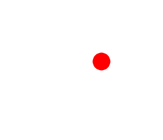

In [2]:
import networkx as nx

# Create and draw a single node graph
g = nx.Graph() 
g.add_node(1) 

fig, axs = plt.subplots(figsize=(2, 2))
nx.draw(g, ax=axs)

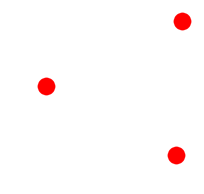

In [3]:
# Create and draw a three node graph

g.add_nodes_from([2, 3]) 

fig, axs = plt.subplots(figsize=(3, 3))
nx.draw(g, ax=axs)

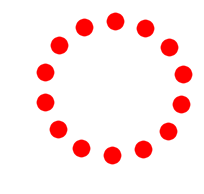

In [4]:
# Create and draw a fourteen node graph

g.add_nodes_from(range(4, 15)) 

fig, axs = plt.subplots(figsize=(3, 3))
nx.draw(g, ax=axs)

In [5]:
# List nodes

print(g.nodes())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


-----

In the next Code cell, we add several nodes that demonstrate using non-standard types. First, we add several functions to the graph, before adding an open file handle. We next display the list of nodes in the graph (showing the functions and open file handle). Following this, we demonstrate how to remove nodes, first by removing the non-integer nodes one at a time, before we remove several integer nodes in bulk. 

-----

In [6]:
# Build graph of mixed nodes, integers, and functions

import math

g.add_node(math.pi)
g.add_node(math.exp)

fout = open('tmp.dat','w')

g.add_node(fout)

print(g.nodes())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 3.141592653589793, <built-in function exp>, <_io.TextIOWrapper name='tmp.dat' mode='w' encoding='UTF-8'>]


In [7]:
# Remove single node
g.remove_node(14)

# Remove non integer nodes
g.remove_node(math.pi)
g.remove_node(math.exp)
g.remove_node(fout)

# Remove list of nodes
g.remove_nodes_from([11, 12, 13])

# Show results
print(g.nodes())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


-----

[[Back to TOC]](#Table-of-Contents)

## Edges

On their own, nodes aren't very different than other data we have analyzed. The major change with graph (or network) data is the relationships between nodes. These relationships are modeled by using edges. An edge can be undirected, meaning each node is the same in the relationship, or the edge can be directed, which means there is a preferred direction, of course the edge could be bi-directional. The former is handled with an undirected graph, while the latter is handled with a directed graph. As an example, when using Facebook, two individuals are friends with each other (via a request), thus the edge is undirected, whereas in Twitter one individual might follow another individual, leading to a directed edge. Of course if two Twitter users follow each other, we have a bi-directional edge (it is still directional since other edge will all be directed, just possibly in one direction.

In the following Code cells, we demonstrate adding edges to a graph. We first add a single edge, by listing the starting and ending nodes, before adding multiple edges by supplying a list of tuples, where each tuple provides the initial and ending node. Following this, we demonstrate several different methods for drawing the same graph. These techniques differ based on the mechanism by which nodes are laid out, which can be affected by the edges in the graph.

-----

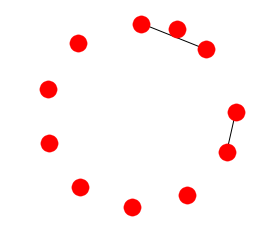

In [8]:
# Add single edge

g.add_edge(0, 1)

edgs = (3, 6)
g.add_edge(*edgs)

fig, axs = plt.subplots(figsize=(4, 4))
nx.draw(g, ax=axs)

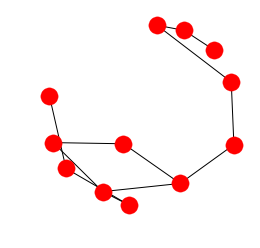

In [9]:
# Remove edge
g.remove_edge(0, 1)

# now add new edges en masse.
edgs = [(idx, idx + 1) for idx in range(g.order())]
g.add_edges_from(edgs)

# Draw graph
fig, axs = plt.subplots(figsize=(4, 4))
nx.draw(g, ax=axs)

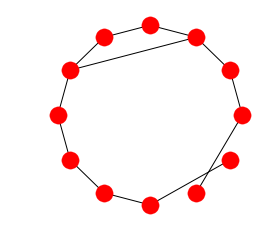

In [10]:
fig, axs = plt.subplots(figsize=(4, 4))
nx.draw_circular(g, ax=axs)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


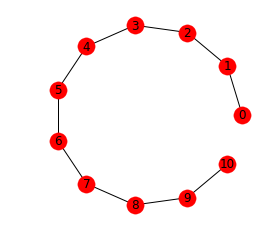

In [11]:
# Shortcut to make this graph
h = nx.path_graph(11)
print(h.nodes())

# Draw graph in circular format
fig, axs = plt.subplots(figsize=(4, 4))
nx.draw_circular(h, with_labels=True, ax=axs)

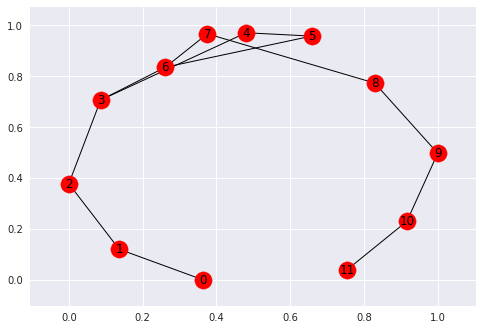

In [12]:
# Draw graph in networkx format
nx.draw_networkx(g)

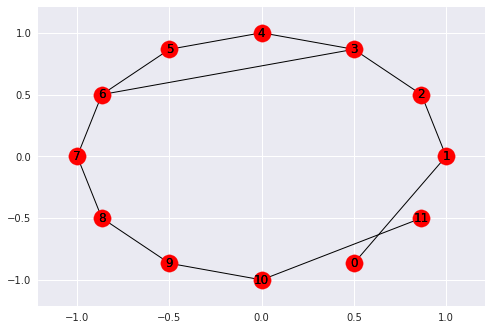

In [13]:
# Plot and specify node positions

pos=nx.circular_layout(g)
nx.draw_networkx(g, pos)
lbls = nx.draw_networkx_labels(g, pos)

-----

We also can create nodes by using string values. In the following Code cells, we create an undirected graph and add five nodes with string values for one through five, before adding different edges between these nodes, creating a kite like graph. We next display basic graph properties, such as the number of nodes and edges, the list of nodes and edges, and the number of neighbors (via the edge connections) to several different nodes. 

-----

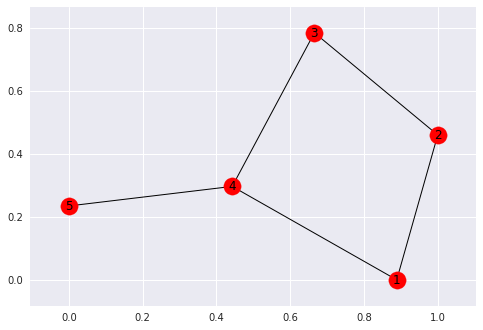

In [14]:
# Create a new arbitrary graph by hand, with string labels

g = nx.Graph()  
g.add_node('1')  
g.add_node('2')  
g.add_node('3')  
g.add_node('4')  
g.add_node('5')  
g.add_edge('1', '2')  
g.add_edge('2', '3')  
g.add_edge('3', '4')  
g.add_edge('4', '1')  
g.add_edge('4', '5')

# Plot graph
nx.draw_networkx(g)

In [15]:
n_nds = g.order() # or g.number_of_nodes()
n_edgs = g.size() # or g.number_of_edges()
print(f'Graph has {n_nds} nodes and {n_edgs} edges')

print('\nNodes in the Graph:')
print(g.nodes())

print('\nEdges in the Graph:')
print(g.edges())

nd = '4'

# The node degree is the number of edges adjacent to that node.
print(f'\nNeighbors to node #{nd}')
print(g.degree(nd))

# List neighbors
print(f'\nNeighbors to node #{nd}')
print(g.neighbors(nd))

Graph has 5 nodes and 5 edges

Nodes in the Graph:
['1', '2', '3', '4', '5']

Edges in the Graph:
[('1', '2'), ('1', '4'), ('2', '3'), ('3', '4'), ('4', '5')]

Neighbors to node #4
3

Neighbors to node #4
['3', '1', '5']


-----

[[Back to TOC]](#Table-of-Contents)

## Attributes

Each entity in the graph, including the graph itself, can possess individual attributes. For example, a node can have a `name` attribute, while a different node can have the `name` attribute and a `type` attribute. Attributes can be defined at creation time or at later times, and some entities have _special_ attributes, such as the `weight` attribute for an edge. The attributes of the graph, node, or edge are maintained in a dictionary, and are thus accessed by using dictionary access methods. In the following Code cells, we demonstrate how to create or add attributes to the graph, to nodes, and to edges. 

-----

{'my_name': 'Test', 'type': 'Demo'}


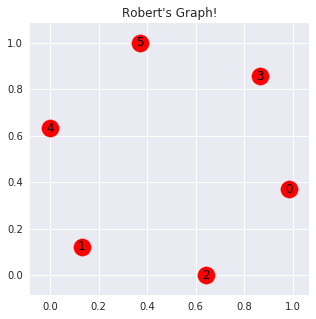

In [16]:
# Graph Attributes

# Specify an attribute at graph creation
g = nx.Graph(my_name = 'Test')
g.add_nodes_from(range(6))

# Add an attribute by using a dictionary
g.graph['type'] = 'Demo'
print(g.graph)

# Set a default attribute
g.name = 'Robert\'s Graph!'

fig, axs = plt.subplots(figsize=(5, 5))

axs.set(title=f'{g.name}')
nx.draw_networkx(g, ax=axs)

In [17]:
# Node attributes

nd = 6
g.add_node(nd, name='Robert')
print(nd, g.node[nd])
print(f'Node {nd} name = {g.node[nd]["name"]}')

nd = 5
g.node[nd]['name'] = 'Edward'
print(nd, g.node[nd])
print(f'Node {nd} name = {g.node[nd]["name"]}')

6 {'name': 'Robert'}
Node 6 name = Robert
5 {'name': 'Edward'}
Node 5 name = Edward


In [18]:
# Edge attributes

# Specify attribute at edge creation
g.add_edge('1', 6, rltn='friends')
print(g['1'][6])

# Special edge attribute is a weight
g.add_edge('1', '3', weight=10.0)
print(g['1']['3'])

# Add multuple weight attributes
g.add_edges_from([(idx, idx + 1, {'weight': (idx + 1) * 10}) 
                  for idx in range(g.order())])

{'rltn': 'friends'}
{'weight': 10.0}


[0, 1, 2, 3, 4, 5, 6, '1', '3', 7, 8, 9]


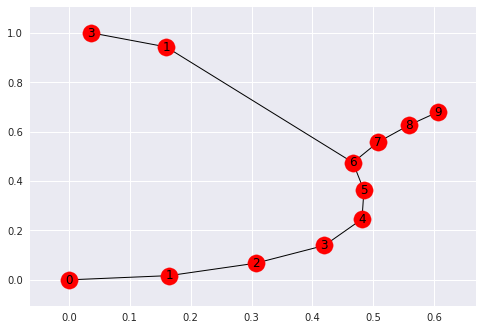

In [19]:
# Now list the nodes and draw the graph

print(g.nodes())
nx.draw_networkx(g)

-----

<font color='red' size = '5'> Student Exercise </font>

In the preceding cells, we introduced several basic graph concepts, including nodes, edges, and attributes. Now that you have run the notebook, go back and make the following changes to see how the results change.

1. Try creating a graph entirely from functions in the `math` library. Draw the graph, how does the graph look? 
2. Try making an arbitrary graph with ten nodes with different edges between the nodes. Draw the graph, does the graph visually appear as you expect? 
3. Try adding more attributes to nodes and edges in your ten node graph. Can you find a way to display the edge attribute on your graph? 

-----

[[Back to TOC]](#Table-of-Contents)

## Matrix Representations

The relationships between nodes in a graph can be [represented numerically][nla] as matrices. The two most used matrix representations are the [adjacency matrix][wam] and the [incidence matrix][wim]. We demonstrate these two matrices for the graph created in the previous few Code cells below. The adjacency matrix contains edges connecting node `i` to node `j` with an entry in position `i`, `j` in the matrix, and the value in the matrix can be the weight of the edge connecting the two nodes. The incidence matrix, on the other hand, represents each node as a row in the matrix and each edge as a column. Thus a value of one, in a standard incidence matrix, shows where an edge connects to a node. Note, how the adjacency matrix includes the weights of the edges connecting different nodes.

-----

[nla]: https://networkx.readthedocs.org/en/stable/reference/linalg.html
[wam]: https://en.wikipedia.org/wiki/Adjacency_matrix
[wim]: https://en.wikipedia.org/wiki/Incidence_matrix

In [20]:
# Adjacency Matrix
adj_mat = nx.adjacency_matrix(g) 

print(adj_mat.todense())

[[  0.  10.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.   0.  20.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  20.   0.  30.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  30.   0.  40.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  40.   0.  50.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  50.   0.  60.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  60.   0.   1.   0.  70.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.  10.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  10.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  70.   0.   0.   0.  80.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  80.   0.  90.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  90.   0.]]


In [21]:
# Incidence Matrix

inc_mat = nx.incidence_matrix(g)
print(inc_mat.todense())

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


-----

[[Back to TOC]](#Table-of-Contents)

## Directed Graphs

To this point, we have simply demonstrated undirected graphs. We now introduce using directed graphs. The first change is the graph creation, where we now use `nx.DiGraph()` to create a simple, directed graph.  Otherwise, we add edges in the same manner, albeit the direction is assumed to be from the starting node to the ending node. If we need to have directed edges going both ways, we simply add an edge with the nodes reversed in order. These concepts are demonstrated in the following cells, where we create and operate on directed graphs.

-----

Nodes: ['1', '2', '3', '4', '5']
Edges: [('1', '2'), ('2', '3'), ('3', '4'), ('4', '1'), ('4', '5'), ('5', '4')]


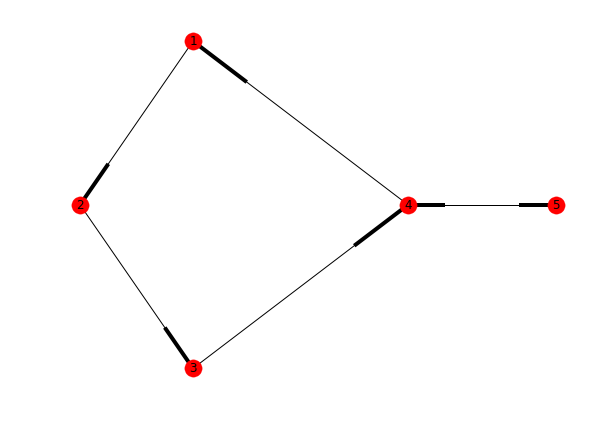

In [22]:
# Create a directed graph, add nodes and edges.
dg = nx.DiGraph()  
dg.add_nodes_from(['1', '2', '3', '4', '5'])   
dg.add_edge('1', '2')  
dg.add_edge('2', '3')  
dg.add_edge('3', '4')  
dg.add_edge('4', '1')  
dg.add_edge('4', '5')  
dg.add_edge('5', '4')  

# Display nodes, edges, and the graph.
print('Nodes:', dg.nodes())
print('Edges:', dg.edges())

nx.draw_spectral(dg, with_labels=True)

Nodes: [1, 2, 3, 4, 5]
Edges: [(1, 2), (2, 3), (3, 4), (3, 1), (3, 5)]

Number of edges entering a node:
{1: 1, 2: 1, 3: 1, 4: 1, 5: 1}

Number of edges leaving a node:
{1: 1, 2: 1, 3: 3, 4: 0, 5: 0}


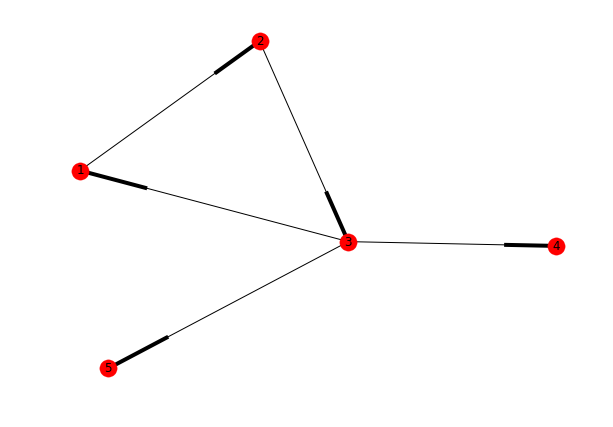

In [23]:
# Create directed graph, and add edges 
# (which adds the corresponding nodes automatically).

dg = nx.DiGraph()   
dg.add_edge(1, 2)   
dg.add_edge(2, 3)   
dg.add_edge(3, 4)   
dg.add_edge(3, 1)   
dg.add_edge(3, 5) 

# Display nodes, edges, and directions.
print('Nodes:', dg.nodes())
print('Edges:', dg.edges())

print('\nNumber of edges entering a node:')
print(dg.in_degree())

print('\nNumber of edges leaving a node:')
print(dg.out_degree())

# Draw graph.
nx.draw(dg, with_labels=True)


Number of edges entering a node:
{0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1}

Number of edges leaving a node:
{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0}

Weighted Number of edges entering a node:
{0: 0, 1: 10, 2: 20, 3: 30, 4: 40, 5: 50, 6: 60, 7: 70, 8: 80}

Weighted Number of edges leaving a node:
{0: 10, 1: 20, 2: 30, 3: 40, 4: 50, 5: 60, 6: 70, 7: 80, 8: 0}


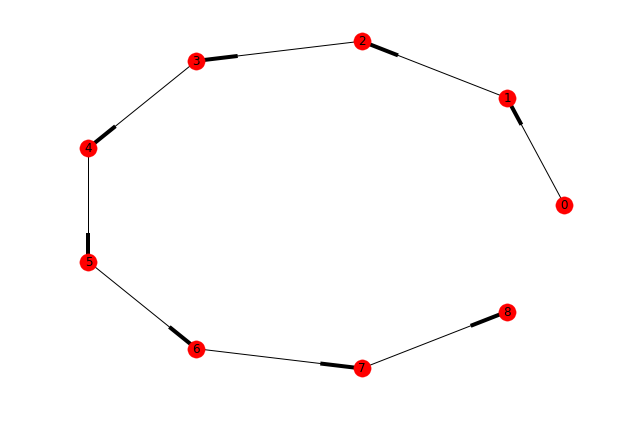

In [24]:
# Create directed graph, and display directed edges, 
# and the weights of directed edges.

dg = nx.DiGraph()  
dg.add_nodes_from(range(8))

dg.add_weighted_edges_from([(idx, idx + 1, (idx + 1) * 10)
                           for idx in range(dg.order())])

print('\nNumber of edges entering a node:')
print(dg.in_degree())

print('\nNumber of edges leaving a node:')
print(dg.out_degree())

print('\nWeighted Number of edges entering a node:')
print(dg.in_degree(weight='weight'))

print('\nWeighted Number of edges leaving a node:')
print(dg.out_degree(weight='weight'))

nx.draw_circular(dg, with_labels=True)

-----

[[Back to TOC]](#Table-of-Contents)

## Multigraphs

All graphs we have created and used within this notebook have been simple, which simply means two nodes can be connected by at most one edge. In some cases, however it makes sense to have multiple edges connecting two nodes. The networkx library provides two graph types, `MultiGraph` and `MultiDiGraph` for complex undirected or directed graphs, respectively. Below we demonstrate using a multi-graph, however, note that the multiple edges are not drawn by networkx. To visualize large or more complex graphs, other tools, such as [Graphviz][gv], are recommended.

-----
[gv]: http://www.graphviz.org

[ (0, 1), (1, 2), (1, 3), (1, 3), (2, 3), (3, 4), (3, 5),
  (3, 5), (4, 5), (5, 6), (5, 7), (5, 7), (6, 7), (7, 8)]


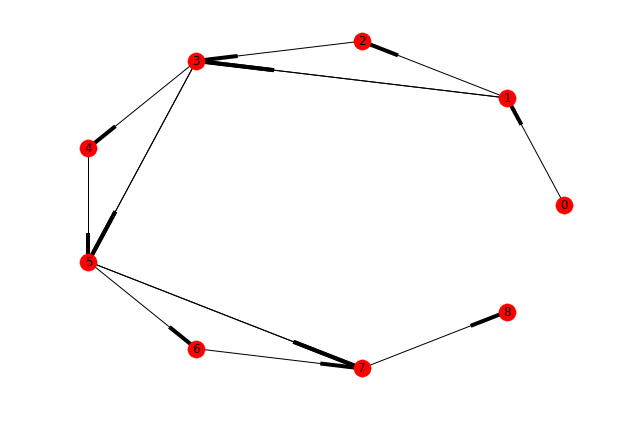

In [25]:
# Create directed multigraph and add nodes
mdg = nx.MultiDiGraph()
mdg.add_nodes_from(range(8))

# Now add edges, including repeat edges.
mdg.add_weighted_edges_from([(idx, idx + 1, (idx + 1) * 10)
                            for idx in range(mdg.order())])

mdg.add_weighted_edges_from([(1, 3, 0.5), (3, 5, 0.25), (5, 7, 0.125)])
mdg.add_weighted_edges_from([(1, 3, 1.5), (3, 5, 2.25), (5, 7, 3.125)])

# Display graph edges and the graph.
import pprint

pp = pprint.PrettyPrinter(indent=2, depth=2, width=58, compact=True)
pp.pprint(mdg.edges())
nx.draw_circular(mdg, with_labels=True)

-----

<font color='red' size = '5'> Student Exercise </font>


In the preceding cells, we introduced directed graphs and multi-graphs. Now that you have run the notebook, go back and make the following changes to see how the results change.

1. Make a directed graph with 20 nodes, and edges connecting every even integer node to the next odd integer node. Draw the resulting graph, did you succeed? 
2. Make an undirected multigraph with five node. Connect each node to the other four nodes, and add new edges between  all even integer nodes (2, 4) and between all odd integer nodes (1, 3, 5). Display the number of edges leaving each node, did you construct your graph correctly?

-----

## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

1. Wikipedia article on [Graph Theory][wgt]
1. Tutorial on [NetworkX][tnx], through Multigraphs
1. [Chapter 1: Overview][ch1] from __Networks, Crowds, and Markets__ by David Easley and Jon Kleinberg 

-----

[wgt]: https://en.wikipedia.org/wiki/Graph_theory

[tnx]: http://networkx.readthedocs.org/en/networkx-1.11/tutorial/index.html

[ch1]: http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch01.pdf



**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode